In [2]:
#import libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#modeling

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df['average']=((df['math score'] + df['reading score'] + df['writing score'])/3).round(2)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [8]:
x=df.drop(columns=['average'],axis=1)
y=df['average']

In [9]:
#transformation 

nf=x.select_dtypes(exclude='object').columns
cf=x.select_dtypes(include='object').columns


from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_tf=StandardScaler()
oh_tf=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
      ('OneHotEncoder',oh_tf,cf),
      ('StandardScaler',num_tf,nf)  
    ]
)

In [10]:
x=preprocessor.fit_transform(x)

In [11]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]], shape=(1000, 20))

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 20), (200, 20))

In [13]:
def evaluate_model(true,pred):
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mean_squared_error(true,pred))
    r2=r2_score(true,pred)
    return mae,mse,rmse,r2

In [14]:
models = {
    'LinearRegression':LinearRegression(),
    'lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = [] 

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for Train set')
    print('Root mean squeard error: {:.4f}'.format(model_train_rmse))
    print('Mean absolute error: {:.4f}'.format(model_train_mae))
    print('Mean squared error: {:.4f}'.format(model_train_mse))
    print('r2 score: {:.4f}'.format(model_train_r2))
    
    
    print('------------------------------------------')
    
    print('model performance for Test set')
    print('Root mean squeard error: {:.4f}'.format(model_test_rmse))
    print('Mean absolute error: {:.4f}'.format(model_test_mae))
    print('Mean squared error: {:.4f}'.format(model_test_mse))
    print('r2 score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_train_r2)
    
    print('='*35)
    print('\n')
    
    

LinearRegression
model performance for Train set
Root mean squeard error: 0.0027
Mean absolute error: 0.0023
Mean squared error: 0.0000
r2 score: 1.0000
------------------------------------------
model performance for Test set
Root mean squeard error: 0.0026
Mean absolute error: 0.0022
Mean squared error: 0.0000
r2 score: 1.0000


lasso
model performance for Train set
Root mean squeard error: 1.0645
Mean absolute error: 0.8505
Mean squared error: 1.1332
r2 score: 0.9943
------------------------------------------
model performance for Test set
Root mean squeard error: 1.1143
Mean absolute error: 0.8769
Mean squared error: 1.2417
r2 score: 0.9942


Ridge
model performance for Train set
Root mean squeard error: 0.0085
Mean absolute error: 0.0068
Mean squared error: 0.0001
r2 score: 1.0000
------------------------------------------
model performance for Test set
Root mean squeard error: 0.0094
Mean absolute error: 0.0073
Mean squared error: 0.0001
r2 score: 1.0000


KNeighborsRegressor
mod

In [15]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 score']).sort_values(by=['R2 score'],ascending=False)

,Model name,R2 score
4,DecisionTreeRegressor,1.000000
0,LinearRegression,1.000000
2,Ridge,1.000000
6,XGBRegressor,0.999983
8,CatBoostRegressor,0.999952
5,RandomForestRegressor,0.999603
1,lasso,0.994319
7,AdaBoostRegressor,0.984827
3,KNeighborsRegressor,0.974449


In [16]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

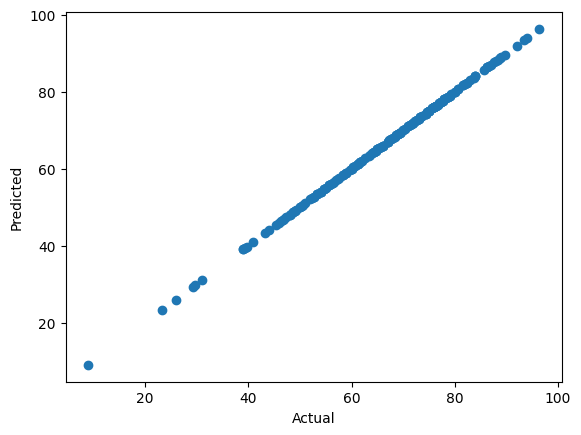

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='average'>

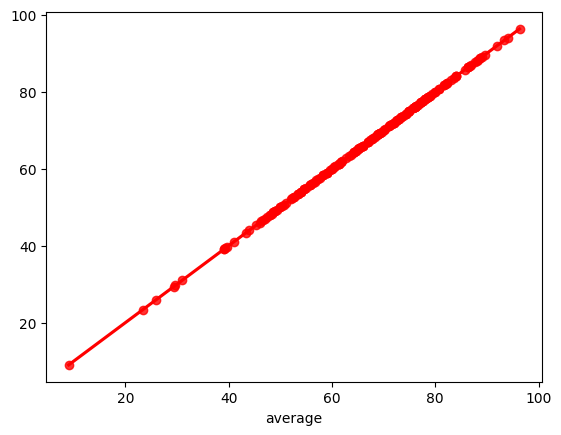

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [19]:
pred_df=pd.DataFrame({'Actual value':y_test,'Pred value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Pred value,Difference
521,87.00,87.000336,-0.000336
737,64.00,63.999784,0.000216
740,75.00,75.000511,-0.000511
660,74.67,74.665723,0.004277
411,81.67,81.665741,0.004259
...,...,...,...
408,55.00,55.001103,-0.001103
332,57.00,56.999800,0.000200
208,77.00,76.999846,0.000154
613,72.00,71.999826,0.000174
